## Observations and Insights 

In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# create dataframe for each csv in resources folder
mouse_metadata = pd.read_csv("../resources/Mouse_metadata.csv")
study_results = pd.read_csv("../resources/Study_results.csv")

# combine the two dataframes into a one
mice_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# display the dataframe
mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# check the number of mice.
number_of_mice = len(mice_df["Mouse ID"].unique())
number_of_mice

249

In [3]:
# get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_df = mice_df.loc[mice_df[["Mouse ID", "Timepoint"]].duplicated(), :]
(duplicate_df["Mouse ID"].unique())[0]


'g989'

In [4]:
# create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = mice_df.drop_duplicates(subset= ["Mouse ID", "Timepoint"])
mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drugs = mice_df["Drug Regimen"].unique()

mean = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
SD = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
SEM = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

tumors_df = pd.DataFrame({"Tumor_Size_mean(mm3)": mean, 
                          "Tumor_Size_median(mm3)": median, 
                          "Tumor_Size_variance(mm3)": variance, 
                          "Tumor_Size_SD(mm3)": SD, 
                          "Tumor_Size_SEM(mm3)": SEM})

tumors_df


,Tumor_Size_mean(mm3),Tumor_Size_median(mm3),Tumor_Size_variance(mm3),Tumor_Size_SD(mm3),Tumor_Size_SEM(mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumors_df.agg(["mean", "median", "var", "std", "sem"], axis="columns")


,mean,median,var,std,sem
Capomulin,22.501087,24.947764,374.380013,19.348902,8.653092
Ceftamin,30.079103,39.290177,626.517148,25.030325,11.193901
Infubinol,30.978709,43.128684,646.806747,25.432396,11.373713
Ketapril,37.274305,53.698743,939.043162,30.643811,13.704329
Naftisol,36.349100,52.509285,887.079235,29.783875,13.319754
Placebo,35.178586,52.288934,817.284060,28.588180,12.785023
Propriva,30.707221,43.138803,631.650995,25.132668,11.239671
Ramicane,21.908789,23.486704,361.734592,19.019322,8.505699
Stelasyn,34.879795,52.431737,800.367277,28.290763,12.652014
Zoniferol,32.214266,48.533355,683.693129,26.147526,11.693529


## Bar and Pie Charts

Text(0, 0.5, 'Number of Tests')

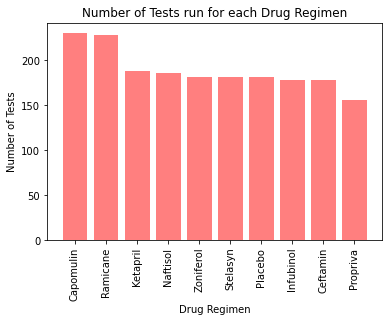

In [8]:
# generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# create dataframe to make bar chart with
drugs_df = pd.DataFrame({"counts": mice_df["Drug Regimen"].value_counts()})
drugs_df.reset_index(level=0, inplace=True)
drugs_df = drugs_df.rename(columns={"index":"Drug Regimen", "counts":"Number of Tests"})

# create bar chart
plt.bar(drugs_df["Drug Regimen"], drugs_df["Number of Tests"], color="r", alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Number of Tests run for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tests")


Text(0.5, 1.0, 'Distribution of Female and Male Mice')

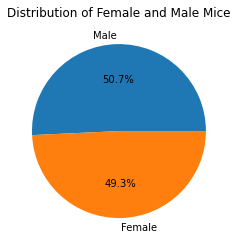

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# create dataframe to make pie chart with
sex_df = pd.DataFrame({"Count": mice_df["Sex"].value_counts()})

# create pie chart
sex_df.reset_index(level=0, inplace=True)
sex_df = sex_df.rename(columns={"index":"Sex"})
plt.pie(sex_df["Count"], labels=sex_df["Sex"], autopct="%1.1f%%")
plt.title("Distribution of Female and Male Mice")

## Quartiles, Outliers and Boxplots

In [33]:
# create dataframe with only the last (greatest) timepoint for each mouse
lasttime_df = mice_df.loc[mice_df["Timepoint"] == 45,:]

# gather all last measured tumor volumes
vols = lasttime_df["Tumor Volume (mm3)"]

# calculate upper and lower quartiles
quartiles = vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")

# calculate outliers
outliers = []
tumors = vols.unique()
for tumor in tumors:
    if (tumor > upper_bound) | (tumor < lower_bound):
        outliers.append(tumor)
if len(outliers) > 1:
    print("\nOutliers: ")
    print(outliers)
else:
    print("\nThere are no outliers in this data set")


The lower quartile is: 40.6583443125
The upper quartile is: 68.8702959775

There are no outliers in this data set


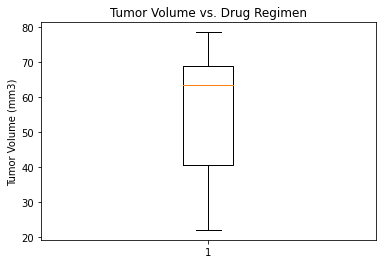

In [34]:
# display data with box plot
fig1, axl = plt.subplots()
axl.set_title("Tumor Volume vs. Drug Regimen")
axl.set_ylabel("Tumor Volume (mm3)")
axl.boxplot(vols)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

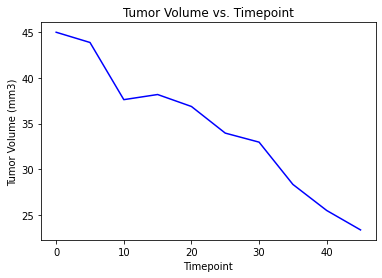

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = mice_df.loc[mice_df["Drug Regimen"] == "Capomulin",:]
s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
s185_df
x = s185_df["Timepoint"]
y = s185_df["Tumor Volume (mm3)"]
plt.plot(x, y, color="blue")
plt.title("Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Tumor Volume (mm3)')

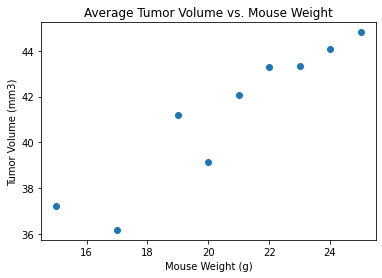

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x = capomulin_df["Weight (g)"].unique()
y = capomulin_df.groupby(capomulin_df["Weight (g)"])["Tumor Volume (mm3)"].mean()
plt.scatter(x,y)
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round((st.pearsonr(x,y))[0],2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print("Regression line equation = " + str(line_eq))
print("Correlation cofficient = " + str(correlation))
